### Data Science


In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#load the simulated dataset
df = pd.read_csv('simulated_giftcard_data.csv.txt')

In [9]:
# take a peak at the first 5 rows of the data
df.head()

,transaction_id,user_id,card_type,amount_usd,rate_ngn,timestamp,is_fraud
0,1,39,Amazon,322.34,531.38,2025-01-01 00:00:00,0
1,2,29,Steam,NaN,518.47,2025-01-01 01:00:00,0
2,3,15,Amazon,488.17,466.26,2025-01-01 02:00:00,1
3,4,43,Amazon,262.99,541.09,2025-01-01 03:00:00,0
4,5,8,iTunes,168.25,532.25,2025-01-01 04:00:00,0


In [10]:
# check the shape of the data
print("Shape:", df.shape)

Shape: (200, 7)


In [11]:
# check the columns in the dataset
df.columns.tolist()

['transaction_id',
 'user_id',
 'card_type',
 'amount_usd',
 'rate_ngn',
 'timestamp',
 'is_fraud']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  200 non-null    int64  
 1   user_id         200 non-null    int64  
 2   card_type       200 non-null    object 
 3   amount_usd      190 non-null    float64
 4   rate_ngn        195 non-null    float64
 5   timestamp       200 non-null    object 
 6   is_fraud        200 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 11.1+ KB


In [13]:
df.describe()

,transaction_id,user_id,amount_usd,rate_ngn,is_fraud
count,200.000000,200.000000,190.000000,195.000000,200.000000
mean,100.500000,24.965000,252.104737,497.478154,0.025000
std,57.879185,13.999777,149.899295,28.700555,0.156517
min,1.000000,1.000000,15.310000,451.450000,0.000000
25%,50.750000,13.000000,122.517500,472.080000,0.000000
50%,100.500000,25.500000,254.405000,496.080000,0.000000
75%,150.250000,37.000000,378.477500,520.870000,0.000000
max,200.000000,49.000000,496.550000,549.970000,1.000000


In [14]:
cardtype_dict = df['card_type'].value_counts()

In [15]:
high_value = df[df['amount_usd']>200]
print("High-Value transactions:\n", high_value.head())

High-Value transactions:
    transaction_id  user_id card_type  amount_usd  rate_ngn  \
0               1       39    Amazon      322.34    531.38   
2               3       15    Amazon      488.17    466.26   
3               4       43    Amazon      262.99    541.09   
5               6       21     Steam      399.64    544.98   
7               8       19    iTunes      225.10    511.34   

             timestamp  is_fraud  
0  2025-01-01 00:00:00         0  
2  2025-01-01 02:00:00         1  
3  2025-01-01 03:00:00         0  
5  2025-01-01 05:00:00         0  
7  2025-01-01 07:00:00         0  


In [16]:
fraud = df[df['is_fraud']==1]

In [17]:
print(fraud)

     transaction_id  user_id card_type  amount_usd  rate_ngn  \
2                 3       15    Amazon      488.17    466.26   
14               15       24    Amazon       94.91    531.06   
107             108       35    Google      166.46    453.93   
140             141       14   Netflix      191.61    482.75   
144             145       15    iTunes      379.16    517.91   

               timestamp  is_fraud  
2    2025-01-01 02:00:00         1  
14   2025-01-01 14:00:00         1  
107  2025-01-05 11:00:00         1  
140  2025-01-06 20:00:00         1  
144  2025-01-07 00:00:00         1  


# Findings from the data so far

### According to the data, the maximum amount_usd is 496.550000
### The card types and the number of times they appear in the dataset are 
### Amazon     49
### Steam      46
### Google     41
### iTunes     35
### Netflix    29

### The Fraud cases according to the dataset are 
### 2    2025-01-01 02:00:00         1  
### 14   2025-01-01 14:00:00         1  
### 107  2025-01-05 11:00:00         1  
### 140  2025-01-06 20:00:00         1  
### 144  2025-01-07 00:00:00         1 


In [18]:
# Checking for missing values
print(df.isnull().sum())

transaction_id     0
user_id            0
card_type          0
amount_usd        10
rate_ngn           5
timestamp          0
is_fraud           0
dtype: int64


In [19]:
df['amount_usd'] = df['amount_usd'].fillna(df['amount_usd'].median())

In [20]:
df['rate_ngn'] = df['rate_ngn'].fillna(df['rate_ngn'].mean())

In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [22]:
df = df.drop_duplicates()

In [23]:
print("After cleaning:\n", df.isnull().sum())

After cleaning:
 transaction_id    0
user_id           0
card_type         0
amount_usd        0
rate_ngn          0
timestamp         0
is_fraud          0
dtype: int64


In [24]:
# group by card_type and calculate mean amount_usd
card_stats = df.groupby('card_type')['amount_usd'].agg(['mean', 'sum', 'count'])
print("Stats by card type:\n", card_stats)

Stats by card type:
                  mean        sum  count
card_type                              
Amazon     242.429898  11879.065     49
Google     263.207317  10791.500     41
Netflix    263.935862   7654.140     29
Steam      253.281739  11650.960     46
iTunes     241.951000   8468.285     35


In [25]:
# group by fraud and get average amount
fraud_stats = df.groupby('is_fraud')['amount_usd'].agg(['mean', 'count'])

In [26]:
print("Stats by fraud status:\n", fraud_stats)

Stats by fraud status:
                 mean  count
is_fraud                   
0         251.916103    195
1         264.062000      5


In [27]:
df.head()

,transaction_id,user_id,card_type,amount_usd,rate_ngn,timestamp,is_fraud
0,1,39,Amazon,322.340,531.38,2025-01-01 00:00:00,0
1,2,29,Steam,254.405,518.47,2025-01-01 01:00:00,0
2,3,15,Amazon,488.170,466.26,2025-01-01 02:00:00,1
3,4,43,Amazon,262.990,541.09,2025-01-01 03:00:00,0
4,5,8,iTunes,168.250,532.25,2025-01-01 04:00:00,0


In [28]:
df.groupby(df['timestamp'].dt.date)['amount_usd'].sum()

timestamp
2025-01-01    6135.120
2025-01-02    4723.605
2025-01-03    5620.840
2025-01-04    6994.825
2025-01-05    6755.550
2025-01-06    5771.875
2025-01-07    5456.715
2025-01-08    6929.885
2025-01-09    2055.535
Name: amount_usd, dtype: float64

In [31]:
import numpy as np
mean_amount = np.mean(df['amount_usd'])
median_amount = np.median(df['amount_usd'])
std_amount = np.std(df['amount_usd'])

In [32]:
print(f"Mean Amount: {mean_amount:.2f}")
print(f"Median Amount: {median_amount:.2f}")
print(f"Standard Deviation Amount: {std_amount:.2f}")

Mean Amount: 252.22
Median Amount: 254.41
Standard Deviation Amount: 145.72


In [33]:
fraud_amounts = df[df['is_fraud'] == 1]['amount_usd']
non_fraud_amounts = df[df['is_fraud'] == 0]['amount_usd']

print(f"Fraud Mean Amount: {np.mean(fraud_amounts):.2f}")
print(f"Non-Fraud Mean Amount: {np.mean(non_fraud_amounts):.2f}")

Fraud Mean Amount: 264.06
Non-Fraud Mean Amount: 251.92


In [ ]:
fraud_percentage = (df['is_fraud'].sum() / len(df)) * 100
print(f"Fraud Percentage: {fraud_percentage:.2f}%")

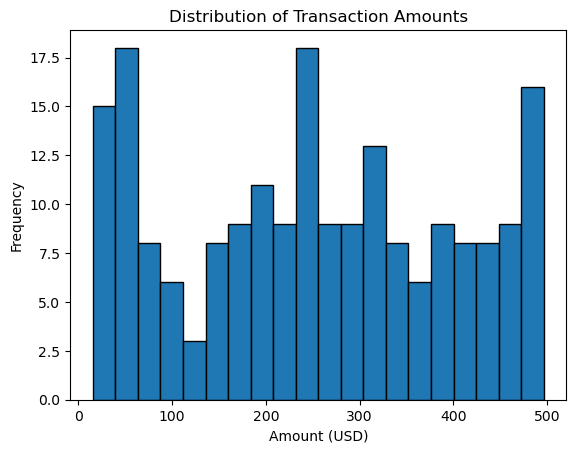

In [35]:
import matplotlib.pyplot as plt

plt.hist(df['amount_usd'], bins=20, edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.show()